# Author: Vyas Kumar
# GRIP @ The Sparks Foundation
# Data Science & Business Analytics intern
# Batch: April 2024
# Project: Exploratory Data Analysis - Retail (Level -Beginner)

## Task: Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [27]:
data=pd.read_csv("SampleSuperstore.csv")

In [28]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [29]:
data.shape

(9994, 13)

In [30]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [32]:
data.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [33]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [34]:
data.duplicated().sum()

17

In [36]:
data.drop_duplicates(subset=None,keep='first',inplace=True)
data.duplicated().sum()

0

In [37]:
data.shape

(9977, 13)

- After droping 17 duplicate values now the dataset have 9977 rows and 13 columns.

In [42]:
# dop unnessesary column 
data.drop(["Postal Code"],axis=1,inplace=True)

## EDA (Exploratory Data Analysis)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10804\256069636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

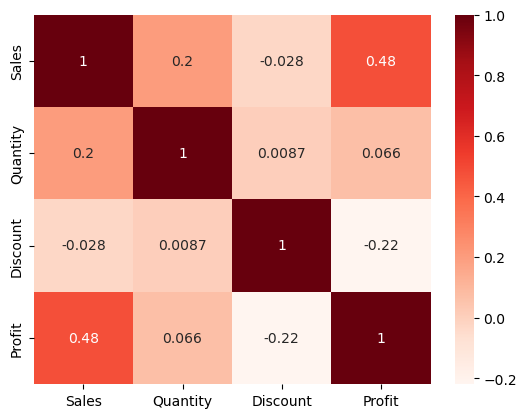

In [47]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

# Ship Mode

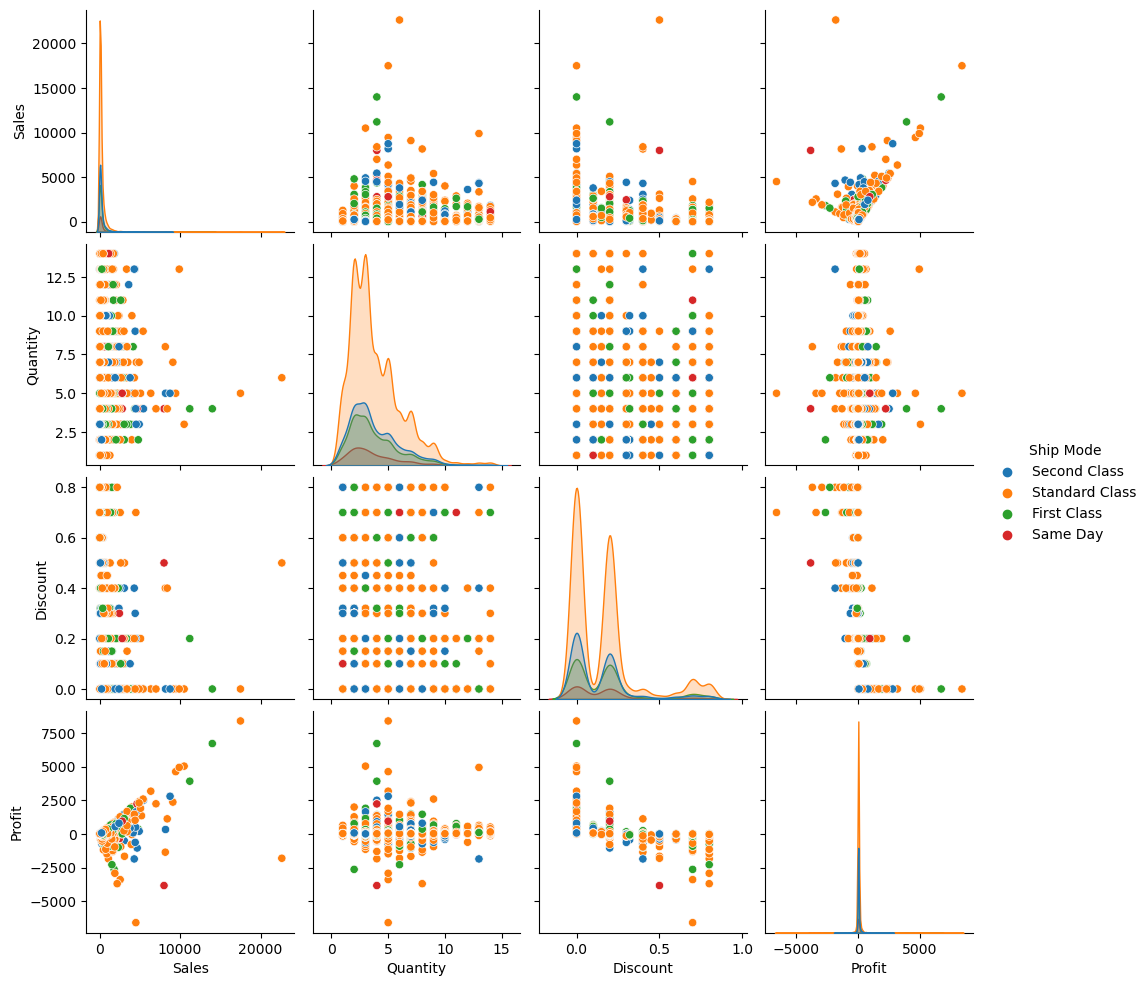

In [49]:
sns.pairplot(data, hue="Ship Mode")

In [51]:
data["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<Axes: xlabel='Ship Mode', ylabel='count'>

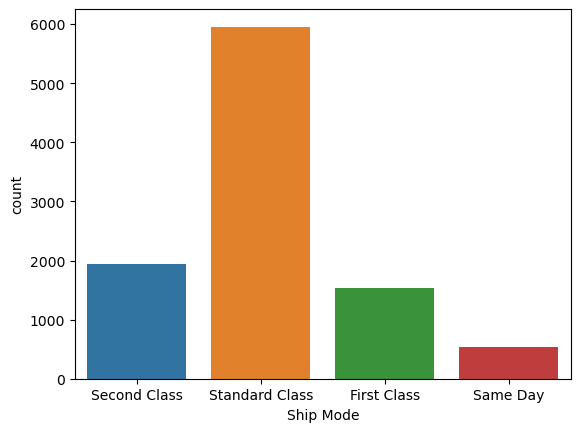

In [52]:
sns.countplot(x=data['Ship Mode'])

- See maximum numbers of orders placed orders are in standard class and few numbers of oreders are in same day

### Average sales for each ship mode

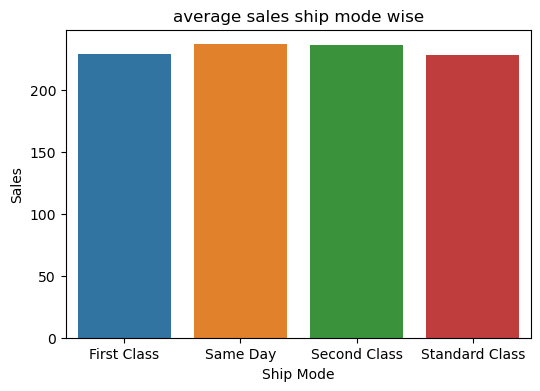

In [56]:
plt.figure(figsize=(6,4))
ship1=data.groupby(['Ship Mode'])['Sales'].mean().reset_index()
sns.barplot(x='Ship Mode',y='Sales',data=ship1)
plt.title('Average Sales Ship Mode Wise')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

### Average profit for each ship mode

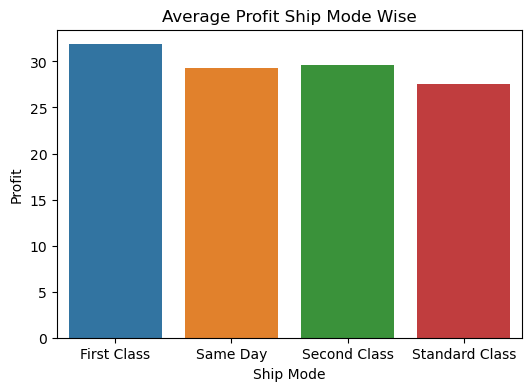

In [57]:
plt.figure(figsize=(6,4))
ship1=data.groupby(['Ship Mode'])['Profit'].mean().reset_index()
sns.barplot(x='Ship Mode',y='Profit',data=ship1)
plt.title('Average Profit Ship Mode Wise')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()

- Orders placed by first class shipment gain the maximum profit from orders, same day and second class shipment profit are   almost same and standard class shipment has less profit.

# Segment

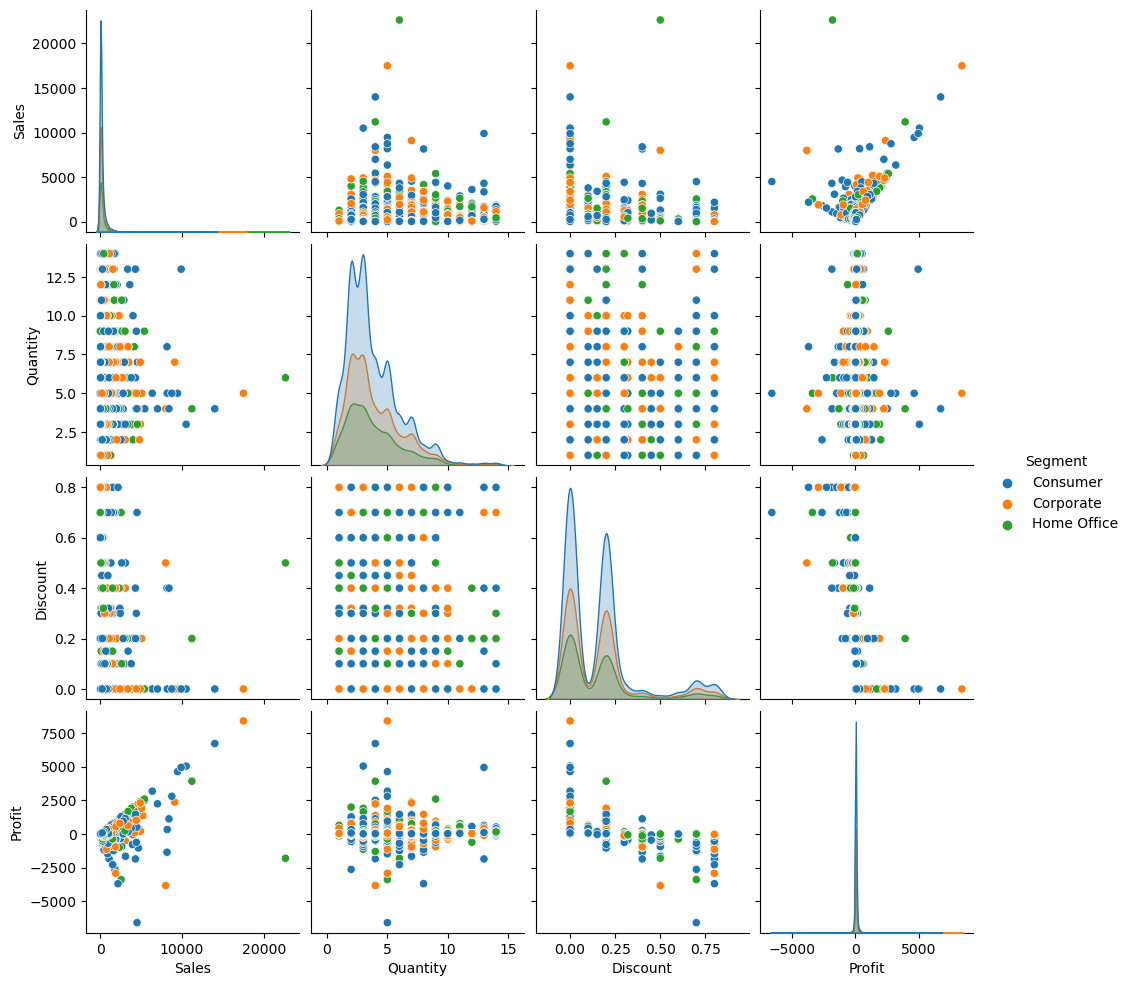

In [53]:
sns.pairplot(data, hue="Segment")

In [59]:
data["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

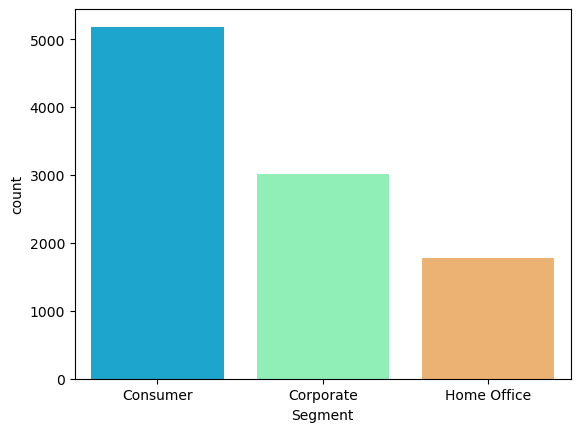

In [60]:
sns.countplot(x = 'Segment',data = data, palette = 'rainbow')

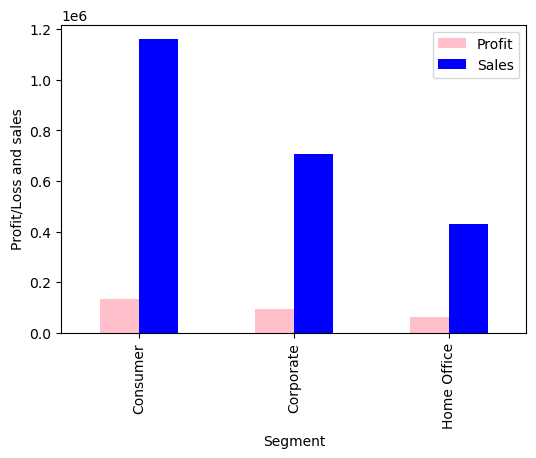

In [99]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(6,4))
plt.ylabel('Profit/Loss and sales')
plt.show()

- Profit and sales are maximum in consumer segment and minimum in Home Office segment

# Category

In [61]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

### Orders distribution by category wise by Pie Chart

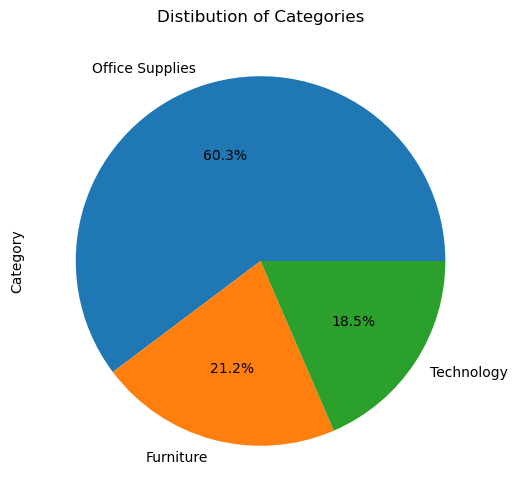

In [76]:
plt.figure(figsize=(8,6))
data['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distibution of Categories")
plt.show()

- Maximum orders almost 60% orders for office supplies, 21% for furniture and 19% for technology

# Sub-Category

In [67]:
data["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

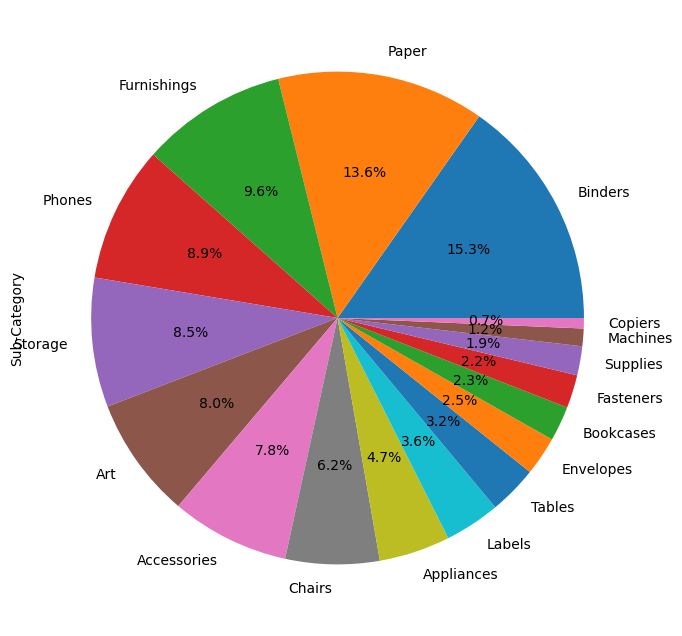

In [72]:
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

- Maximum numbers of orders sub category are binders and paper.

In [77]:
# group all the subcategorical values 
total_subcat=data.groupby("Sub-Category").sum()
total_subcat

C:\Users\DELL\AppData\Local\Temp\ipykernel_10804\2615220237.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_subcat=data.groupby("Sub-Category").sum()


,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27107.0320,2996,59.60,6524.6118
Binders,203409.1690,5971,566.20,30228.0003
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,327777.7610,2351,104.70,26567.1278
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


Text(0.5, 1.0, 'Sales and Profit sub category wise')

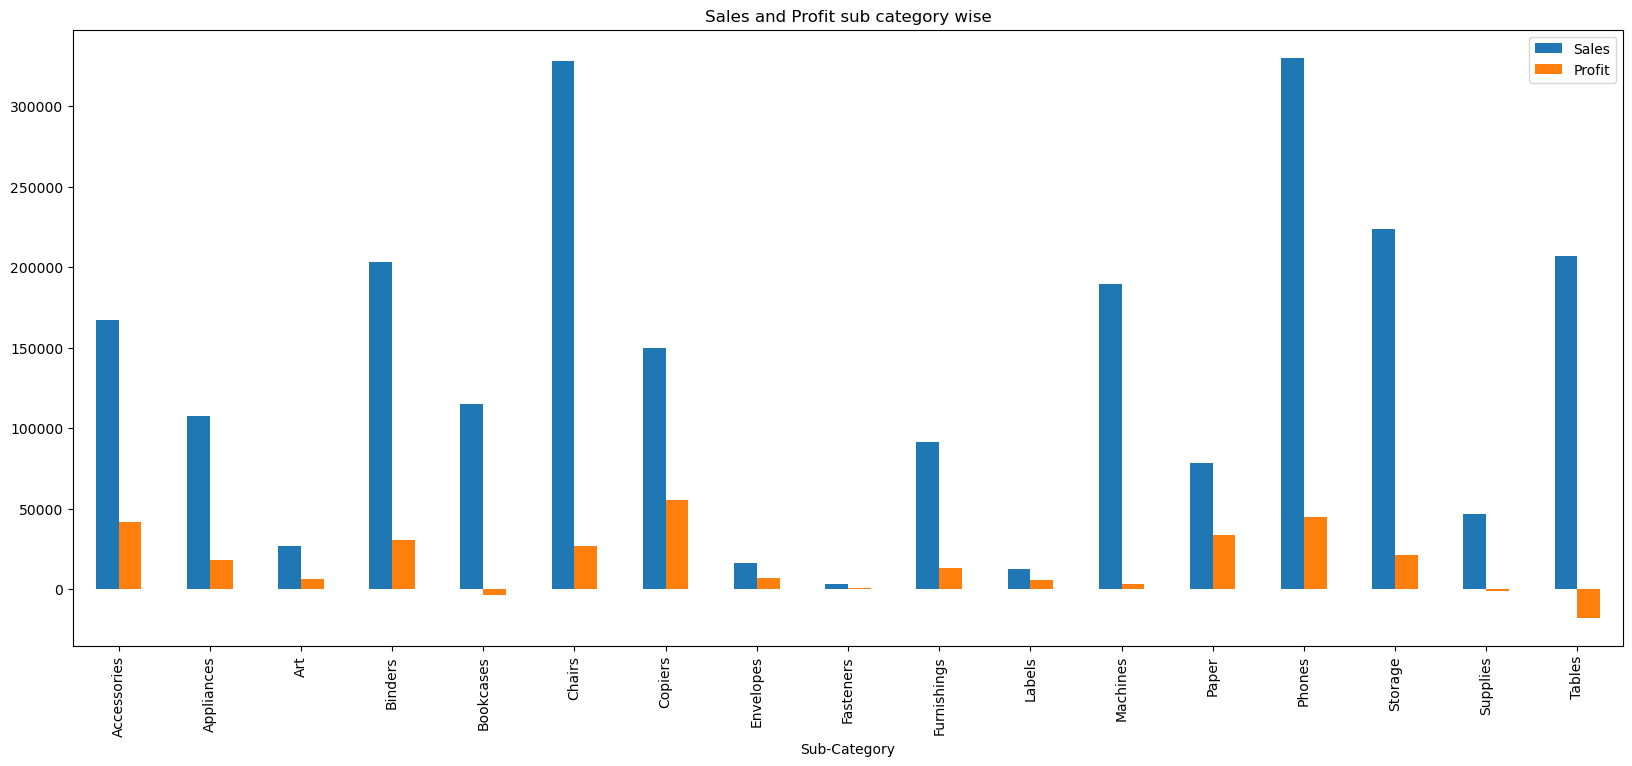

In [78]:
# Create bar plots for Sales and Profit sub category-wise
total_subcat[["Sales","Profit"]].plot(kind="bar",figsize=(20,8))
plt.title('Sales and Profit sub category wise')

- For product chairs and phones total sales are very high and for copiers and phones the profit is high. In case of bookcases and tables there is negative profit.

# States

# Distribution of orders for each state

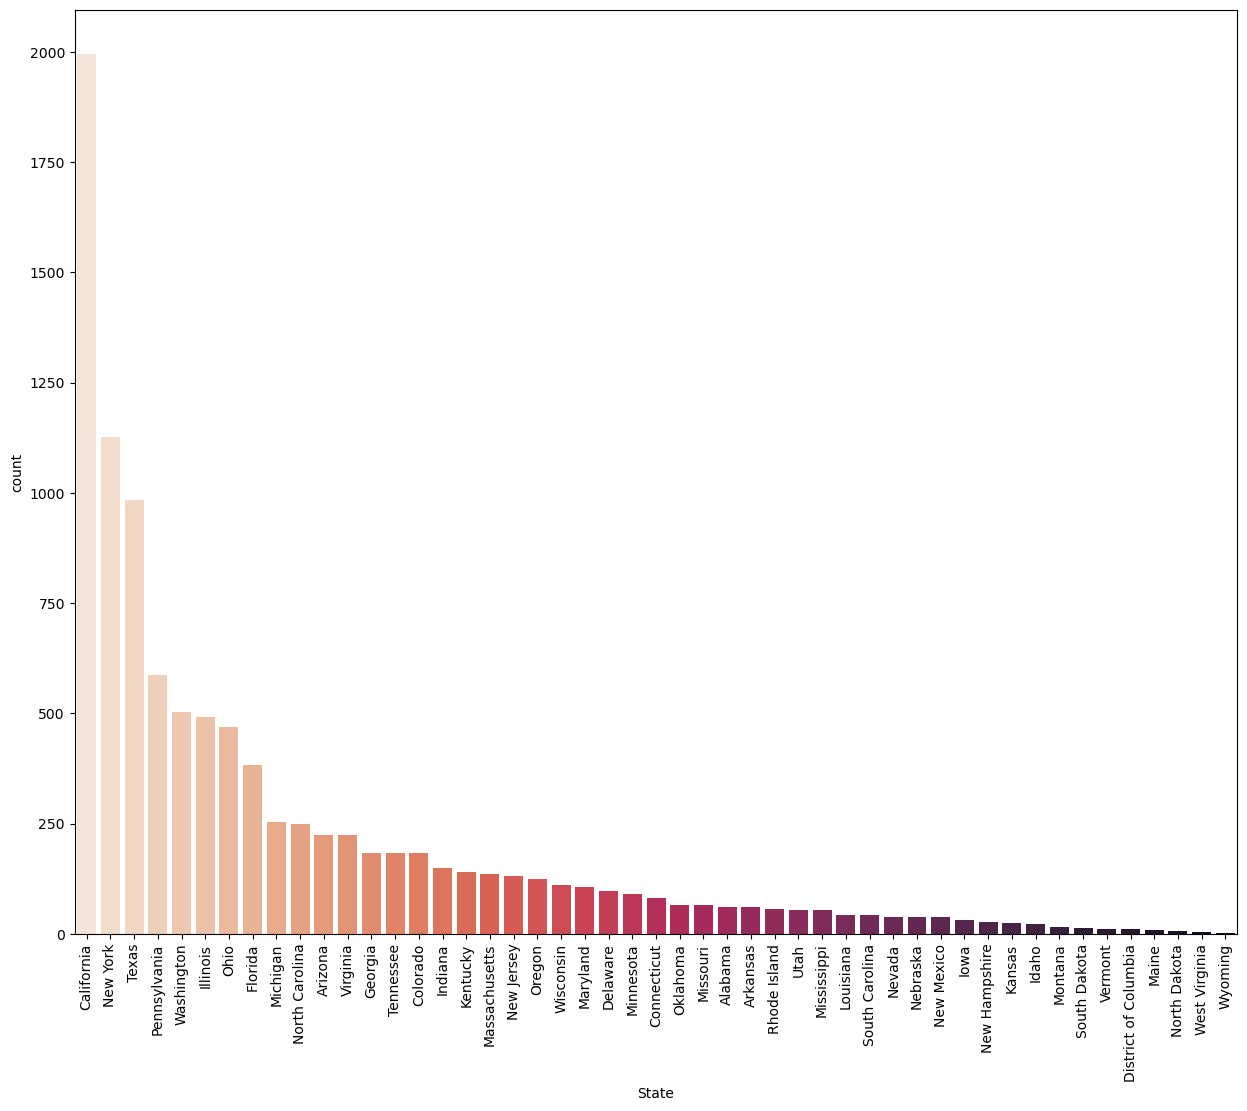

In [80]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rocket_r',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- See highest number of orders are placed from the state of California followed by New York and Texas.

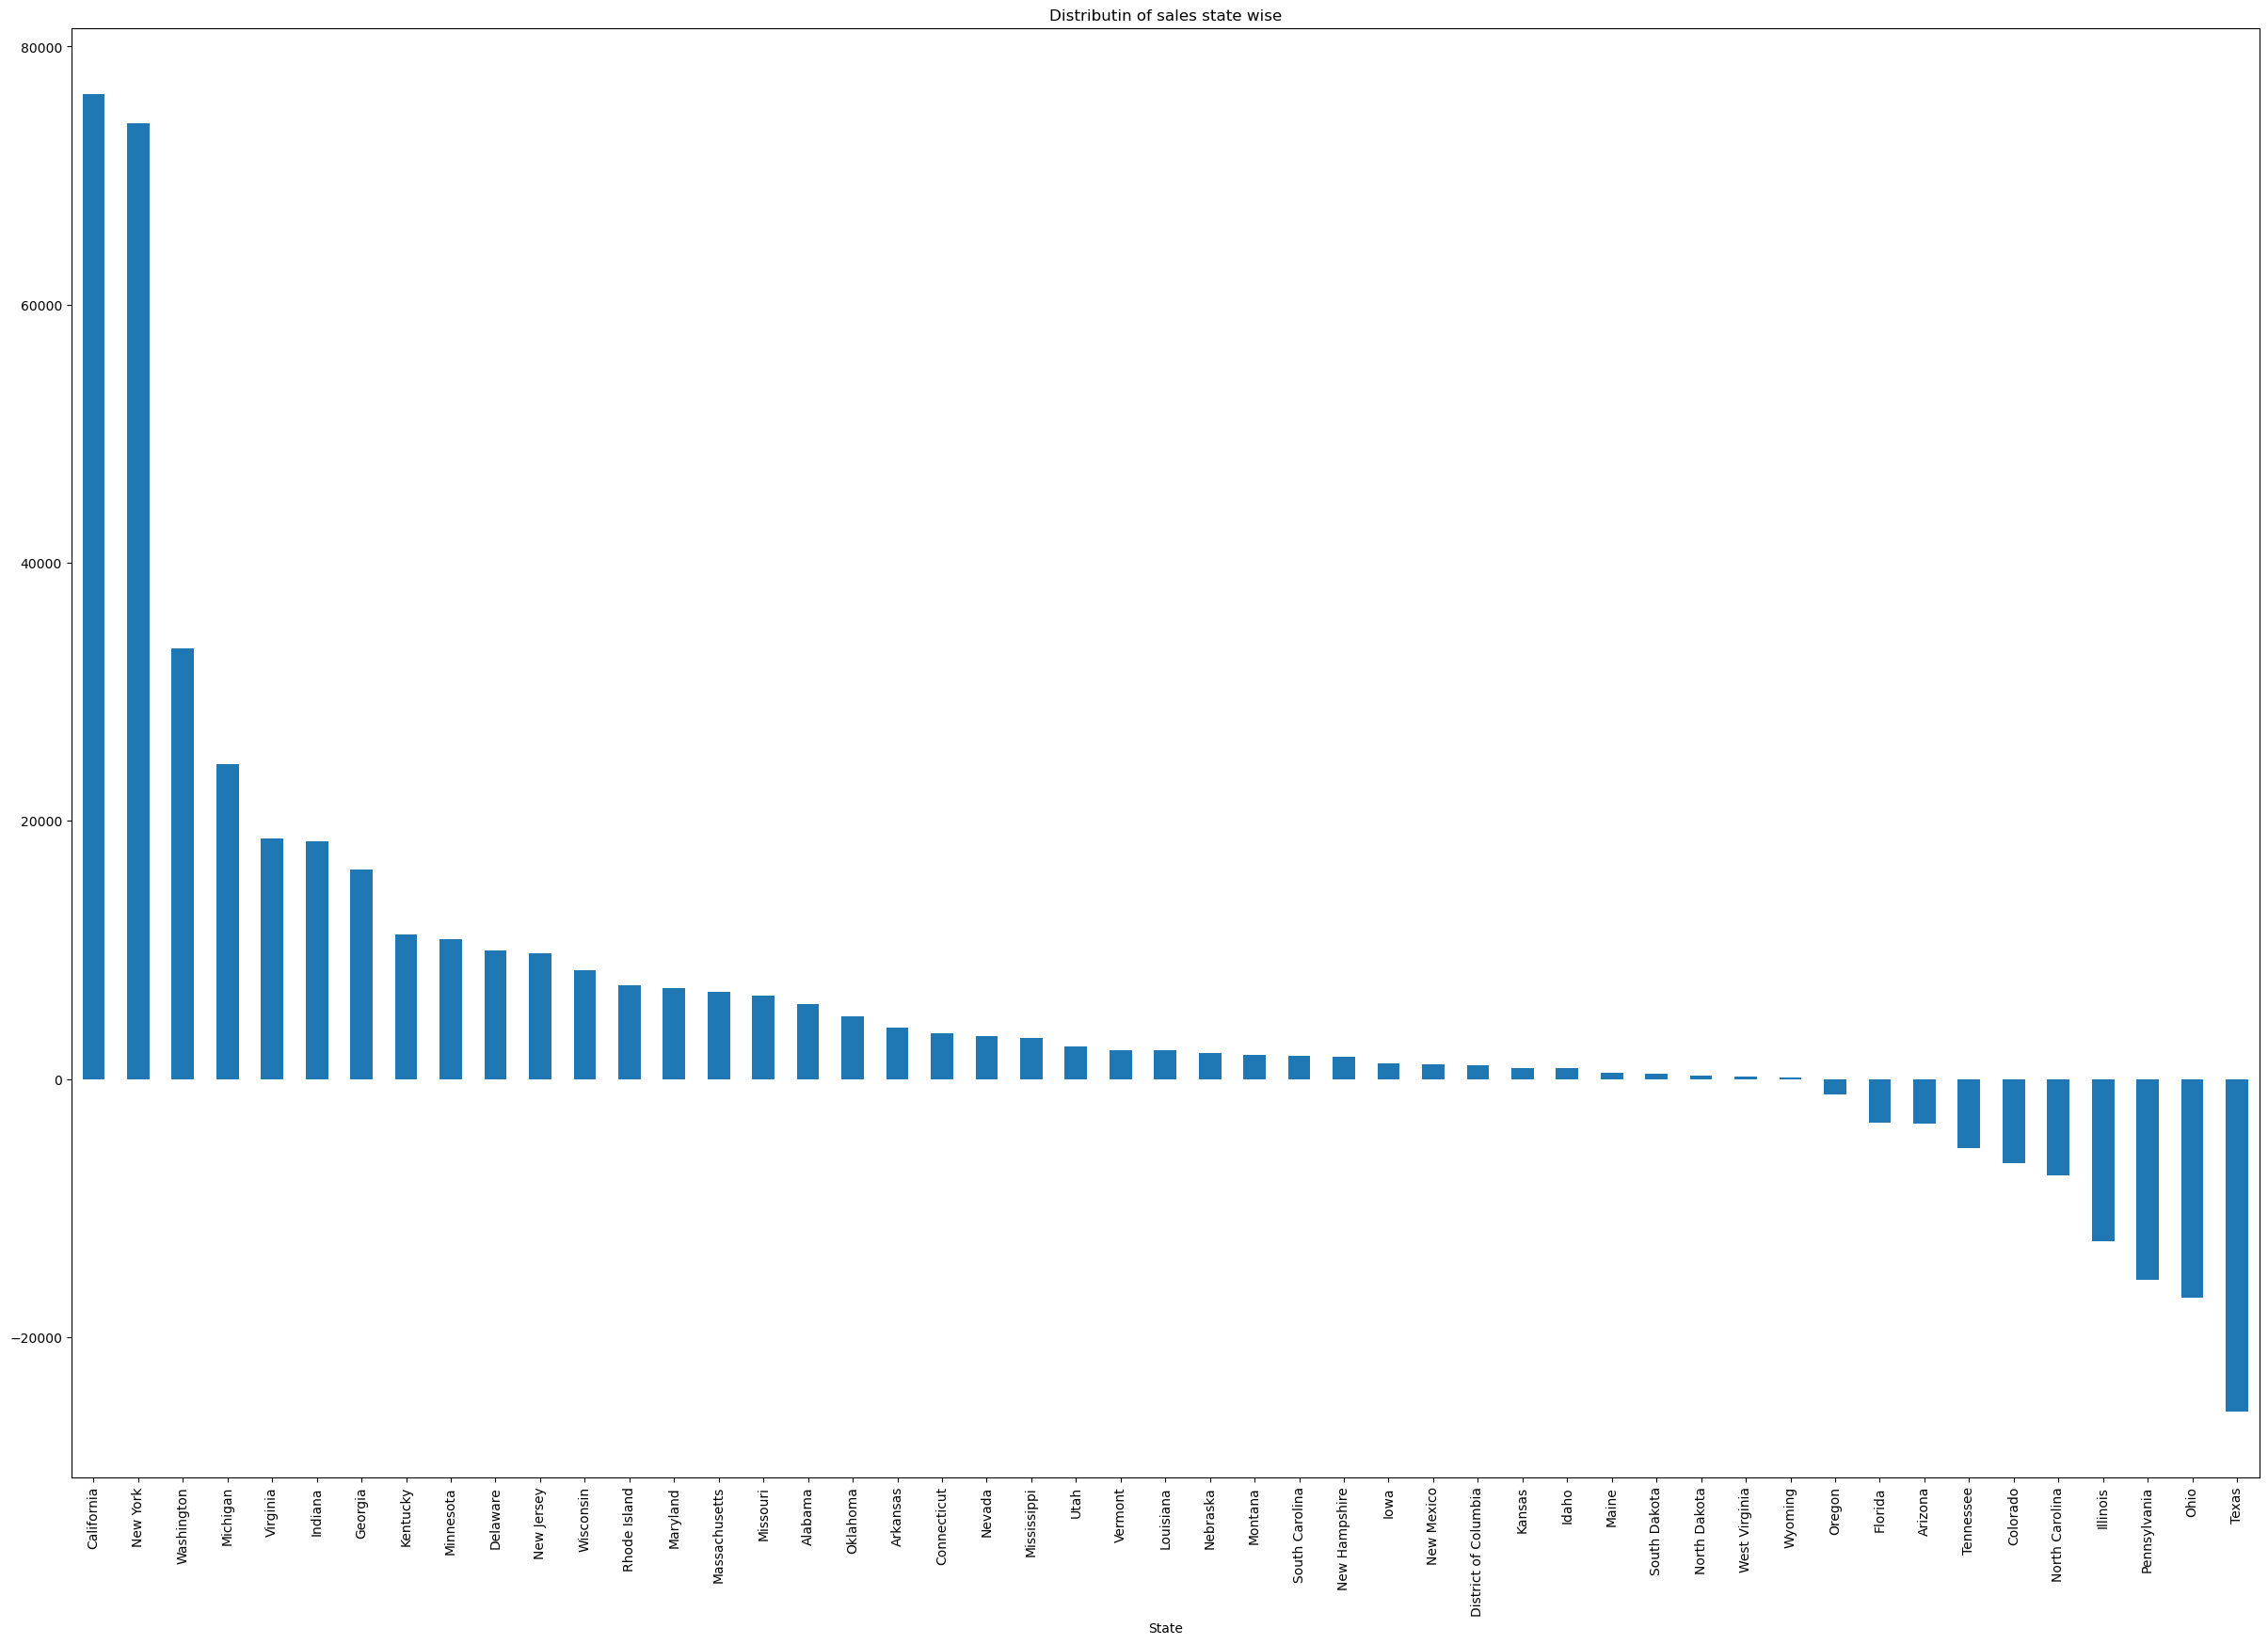

In [85]:
data.groupby("State")["Profit"].sum().sort_values(ascending=False).plot(kind='bar',figsize=[30,20])
plt.title("Distributin of sales state wise")
plt.show()

- Maximum profit earn from the state of california and new york, although good number of orders are placed from texas but the profit is negative.

# Sales and Profit

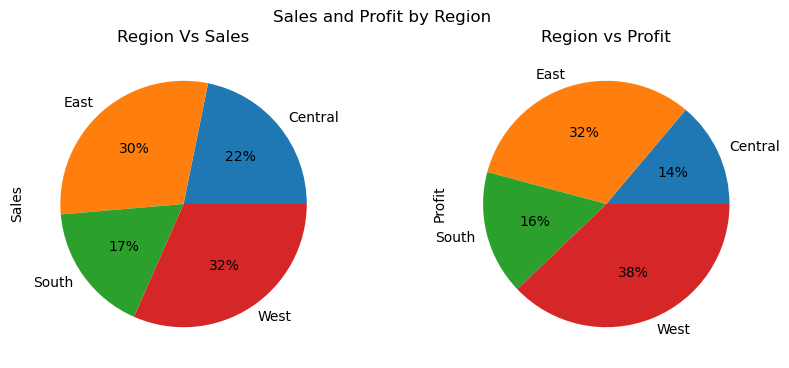

In [86]:
# Initialize a new figure
fig = plt.figure(figsize = (10, 4))

# Create a subplot for the Sales pie chart
plt.subplot(1, 2, 1)
data.groupby("Region")["Sales"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region Vs Sales")

# Create a subplot for the Profit pie chart
plt.subplot(1, 2, 2)
data.groupby("Region")["Profit"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region vs Profit")

# Add a title to the whole plot
plt.suptitle('Sales and Profit by Region')

# Display the plot
plt.show()

- Using pie chart we also see sales are high in west and east region and profit is also high in west and east region.

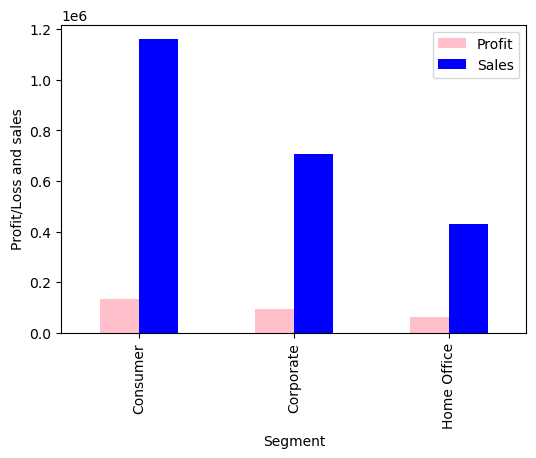

In [90]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(6,4))
plt.ylabel('Profit/Loss and sales')
plt.show()

- Profit and sales are maximum in consumer segment and minimum in Home Office segment.

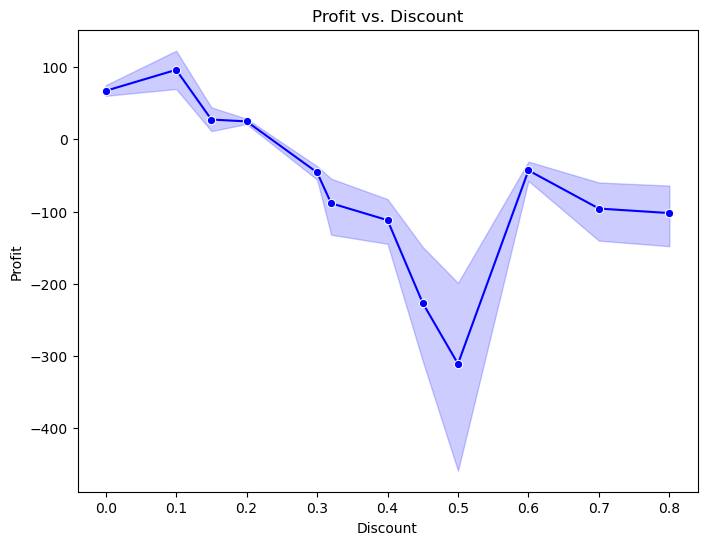

In [92]:
# Create a line plot for Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.lineplot(x="Discount", y="Profit", data=data, marker='o', color='b')

# Add labels and a title
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit vs. Discount")
plt.show()

- See where we give very low discount here profit is increasing but where we give more discount there the profit is drastically reduce.

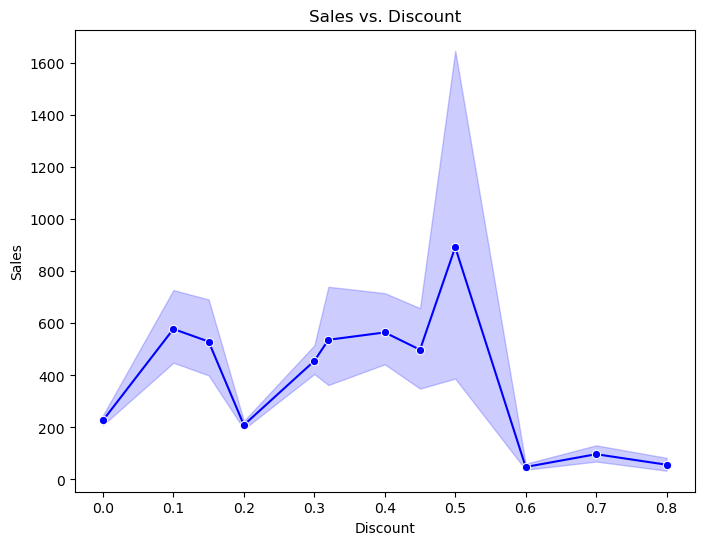

In [96]:
# Create a line plot for Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.lineplot(x="Discount", y="Sales", data=data, marker='o', color='b')

# Add labels and a title
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Sales vs. Discount")
plt.show()

- See till 50% discount the sales are increasing but more than 50% discount the sales are very low.